# Assinment NO: 05 (Logistic Regression)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [50]:
np.random.seed(42)

In [52]:
X1 = np.random.normal(loc=20, scale=8, size=(50, 2))  
X2 = np.random.normal(loc=55, scale=6, size=(50, 2))  


In [54]:
X = np.vstack((X1, X2))

In [56]:
y = np.hstack((np.zeros(50), np.ones(50)))

In [58]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

In [60]:
df.head()

,Feature1,Feature2,Target
0,23.973713,18.893886,0.0
1,25.181508,32.184239,0.0
2,18.126773,18.126904,0.0
3,32.633703,26.139478,0.0
4,16.244205,24.340480,0.0


In [62]:
df.tail()

,Feature1,Feature2,Target
95,52.320910,60.138393,1.0
96,56.284562,47.525567,1.0
97,56.039086,57.311904,1.0
98,49.696855,55.922351,1.0
99,55.349252,48.142178,1.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Target    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = classifier.predict(X_test)

In [74]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0

Confusion Matrix:
 [[12  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [76]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

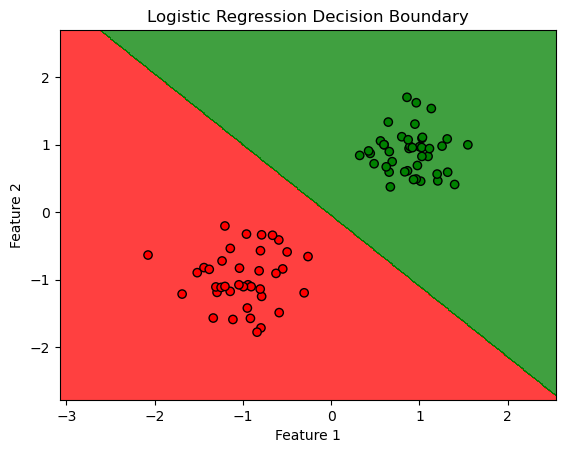

In [78]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()